<a href="https://colab.research.google.com/github/Amitkumardas123/Personalized-Healthcare-Recommendations/blob/main/Personalized_Healthcare_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Personalized Healthcare Recommendations

##### **Contribution**    - Individual
##### **Name**            - Amit Kumar Das

# **Project Summary -**

The Personalized Healthcare Recommendations System project aims to leverage machine learning to provide tailored healthcare advice based on individual patient data. By analyzing a diverse range of factors, including demographic information, medical history, lifestyle choices, biometric data, and lab results, the system seeks to improve patient outcomes through data-driven, actionable insights.

# **Key Objectives:**

***1.Develop a Predictive Model:***

Utilize advanced machine learning algorithms to predict health outcomes and suggest personalized recommendations for patients.

***2.Enhance Patient Care:***

 Offer individualized advice on lifestyle changes, preventive measures, and treatment plans, ultimately aiming to improve overall health and well-being.

***3.Data Integration:***

Aggregate and process data from multiple sources, including electronic health records (EHRs), wearable devices, and patient surveys, to build a comprehensive patient profile.

# **Methodology:**

***1.Dataset Preparation:***

 Collect and preprocess patient data from various sources, ensuring it is clean, normalized, and ready for analysis. Features considered include age, gender, blood pressure, heart rate, diet, exercise habits, and more.

***2.Exploratory Data Analysis (EDA):***

 Conduct in-depth exploration using statistical methods and visualization techniques to identify patterns, correlations, and potential predictive factors within the data.

***3.Feature Engineering:***

 Develop new features and select the most relevant ones to enhance model accuracy and interpretability, focusing on creating health indices and composite scores that better represent patient conditions.

***4.Model Selection and Training:***

 Experiment with various machine learning models, such as Logistic Regression, Random Forest, Gradient Boosting Machines, Support Vector Machines (SVM), and Neural Networks. Train and validate these models to identify the best performer based on accuracy, precision, recall, F1-score, and ROC-AUC.

***5.Model Evaluation:***

 Rigorously evaluate the selected model using cross-validation and test datasets. Visualize performance through confusion matrices and ROC curves to ensure the model's reliability and effectiveness.

***6.Recommendation System Implementation:***

 Develop an algorithm that translates model predictions into personalized healthcare recommendations. The system is designed to be interpretable and actionable, ensuring that both healthcare professionals and patients can easily understand and apply the advice provided.

***7.Deployment and Monitoring:***

Implement the system in a user-friendly interface or API, allowing seamless integration into healthcare workflows. Continuously monitor the system's performance, updating the model as new data becomes available to maintain accuracy and relevance.

# **Outcomes:**

The Personalized Healthcare Recommendations System is expected to significantly enhance patient care by providing targeted advice that is specifically tailored to each individual's unique health profile. This data-driven approach aims to support healthcare providers in making informed decisions, ultimately leading to better patient outcomes, reduced healthcare costs, and a more personalized approach to medicine.

This project aligns with the broader goal of advancing precision medicine, using cutting-edge technology to tailor healthcare to individual needs, thus paving the way for more effective and efficient patient care.

# **GitHub Link -**

# ***Let's Begin !***

In [1]:
# Import Libraries

# libraries that are used for data read,analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# libraries used to implement models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# libraries to evaluate performance
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Load Dataset

Data = pd.read_csv("/content/drive/MyDrive/Unified mentor projects/MY PROJECT/Personalized Healthcare Recommendations/blood.csv")

In [3]:
# Dataset First Look
# Viewing the first 5 rows of the datset

Data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# Dataset Rows & Columns count

print(f'number of rows : {Data.shape[0]}  \nnumber of columns : {Data.shape[1]}')

number of rows : 748  
number of columns : 5


# **Know Your Features/Variable**

    Recency: The number of months since the last donation.

    Frequency: The total number of donations made by an individual.

    Monetary: The amount of blood donated (possibly in milliliters or a monetary value associated with the donations).

    Time: The total time (likely in months) since the first donation.

    Class: The target variable, indicating whether the individual is likely to donate blood again (1) or not (0).

#### Duplicate Values

In [5]:
# Dataset Duplicate Value Count

dup = len(Data[Data.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 215


In [6]:
# Remove Duplicate Value in Dataset

Data.drop_duplicates(inplace = True)

In [7]:
# Again Count Dataset Duplicate Value

dup = len(Data[Data.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 0


In [8]:
Data.shape

(533, 5)

**Only 533 data point available for model building, which is not enough to build a better model.so need to generate datapoints for our model building**

In [11]:
# Function to generate synthetic data
def generate_synthetic_data(df, num_multiplier):
    original_size = df.shape[0]
    target_size = original_size * num_multiplier

    synthetic_data = []

    while len(synthetic_data) < target_size:
        # Select a random row
        random_row = df.sample()

        # Generate noise for numeric columns
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        noisy_row = random_row.copy()
        for col in numeric_columns:
            noise = np.random.normal(0, 0.01 * df[col].std())  # Adjust noise level as needed
            noisy_row[col] += noise

        # Randomly change the categorical column
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns
        for col in categorical_columns:
            noisy_row[col] = np.random.choice(df[col].unique())

        # Convert noisy_row to a numpy array
        noisy_row_array = noisy_row.values.flatten()

        # Check for uniqueness in synthetic_data
        if len(synthetic_data) == 0 or not any((noisy_row_array == np.array(synthetic_data)).all(1)):
            synthetic_data.append(noisy_row_array)

    # Convert synthetic data back to a DataFrame
    synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)

    # Concatenate with the original data
    final_df = pd.concat([df, synthetic_df], ignore_index=True)

    return final_df

# Generate 4 times the original data without duplicates
augmented_df = generate_synthetic_data(Data, num_multiplier=7)  # 7x synthetic + original = 8x total

# Reset index and ensure data types are correct
augmented_df = augmented_df.astype(Data.dtypes.to_dict()).reset_index(drop=True)

print(f"Original dataset size: {Data.shape}")
print(f"Augmented dataset size: {augmented_df.shape}")

Original dataset size: (533, 5)
Augmented dataset size: (4264, 5)


### Dataset Information

In [12]:
# Checking the datatype of each features in our original datset

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    533 non-null    int64
 1   Frequency  533 non-null    int64
 2   Monetary   533 non-null    int64
 3   Time       533 non-null    int64
 4   Class      533 non-null    int64
dtypes: int64(5)
memory usage: 25.0 KB


In [13]:
# now check the datatype of Augmented datset
augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    4264 non-null   int64
 1   Frequency  4264 non-null   int64
 2   Monetary   4264 non-null   int64
 3   Time       4264 non-null   int64
 4   Class      4264 non-null   int64
dtypes: int64(5)
memory usage: 166.7 KB


**Our Target Variable is in integer format so we need to convert into categorical format.**

In [14]:
# Ensure the 'Class' column is treated as a categorical variable
augmented_df['Class'] = augmented_df['Class'].astype('category')

In [17]:
# Again Checking the datatype of each features

augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4264 non-null   int64   
 1   Frequency  4264 non-null   int64   
 2   Monetary   4264 non-null   int64   
 3   Time       4264 non-null   int64   
 4   Class      4264 non-null   category
dtypes: category(1), int64(4)
memory usage: 137.7 KB


In [18]:
# Counting The non null value present in our dataset

augmented_df.isnull().sum()

,0
Recency,0
Frequency,0
Monetary,0
Time,0
Class,0


In [19]:
# Describe  the  features of dataset

augmented_df.describe()

,Recency,Frequency,Monetary,Time
count,4264.000000,4264.000000,4264.000000,4264.000000
mean,9.002345,6.505629,1736.119841,41.648921
std,8.157147,6.122716,1525.618785,23.033879
min,0.000000,0.000000,203.000000,1.000000
25%,2.000000,3.000000,750.000000,25.000000
50%,7.000000,5.000000,1265.000000,37.000000
75%,14.000000,8.000000,2247.000000,57.000000
max,74.000000,50.000000,12519.000000,99.000000


**Its look like our dataset is neat & clean.so we can go with our analysis.**


# **Looking the distribution of independent features.**

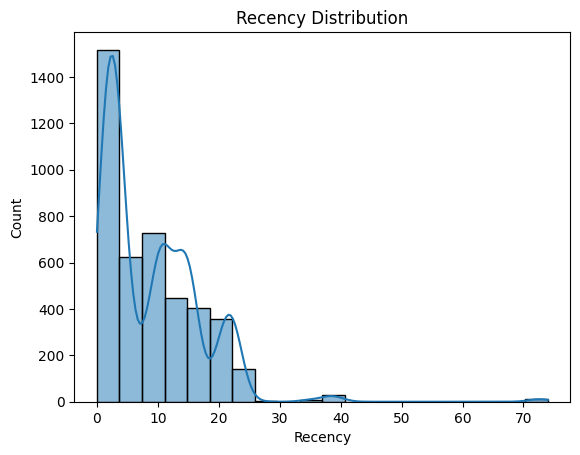

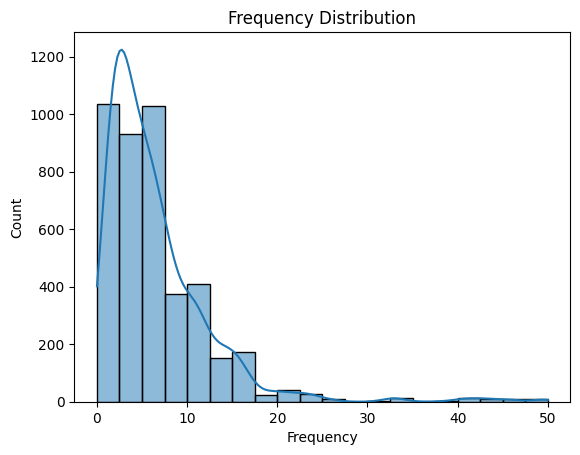

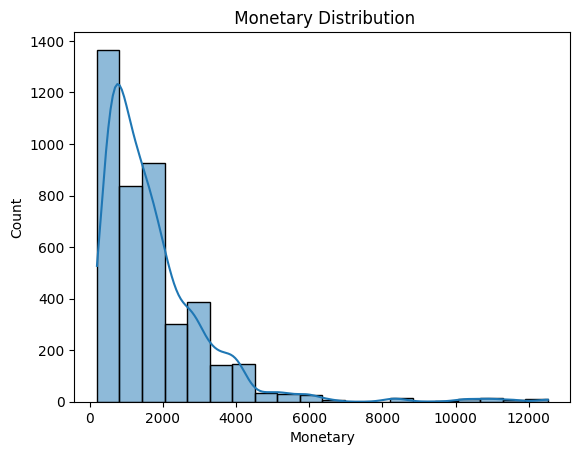

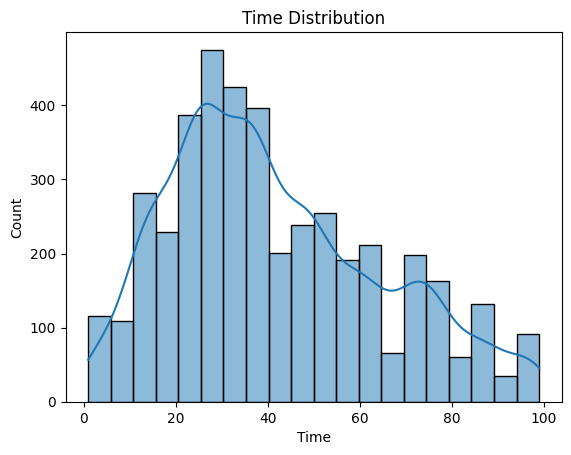

In [20]:
# Distribution of key features

sns.histplot(augmented_df['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')
plt.show()

sns.histplot(augmented_df['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')
plt.show()

sns.histplot(augmented_df['Monetary'], bins=20, kde=True)
plt.title(' Monetary Distribution')
plt.show()

sns.histplot(augmented_df['Time'], bins=20, kde=True)
plt.title('Time Distribution')
plt.show()


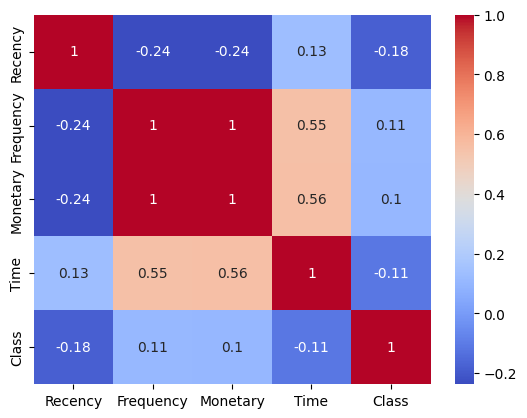

In [21]:
# Correlation matrix to see relationships between variables

corr_matrix = augmented_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Here we can see that Frequency and monetary features are strongly correlated (Independent features should be independent)with each other.so we make a new feature combinig this two features.

In [22]:
# Creating a new feature combining Monetary and Frequency
augmented_df['Frequency_Monetary'] = augmented_df['Monetary'] * augmented_df['Frequency']

In [23]:
# Drop the 'Monetary' and 'Frequency' columns
augmented_df = augmented_df.drop(columns=['Monetary','Frequency'])

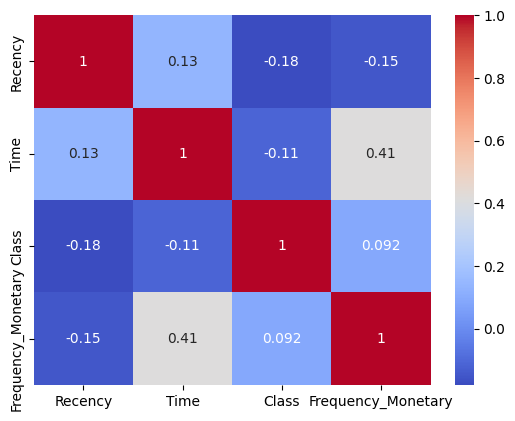

In [24]:
# Correlation matrix to see relationships between variables

corr_matrix = augmented_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#Checking For class imbalance

In [25]:
augmented_df['Class'].value_counts()

,count
Class,
0,3597
1,667


Class
0    3597
1     667
Name: count, dtype: int64
 


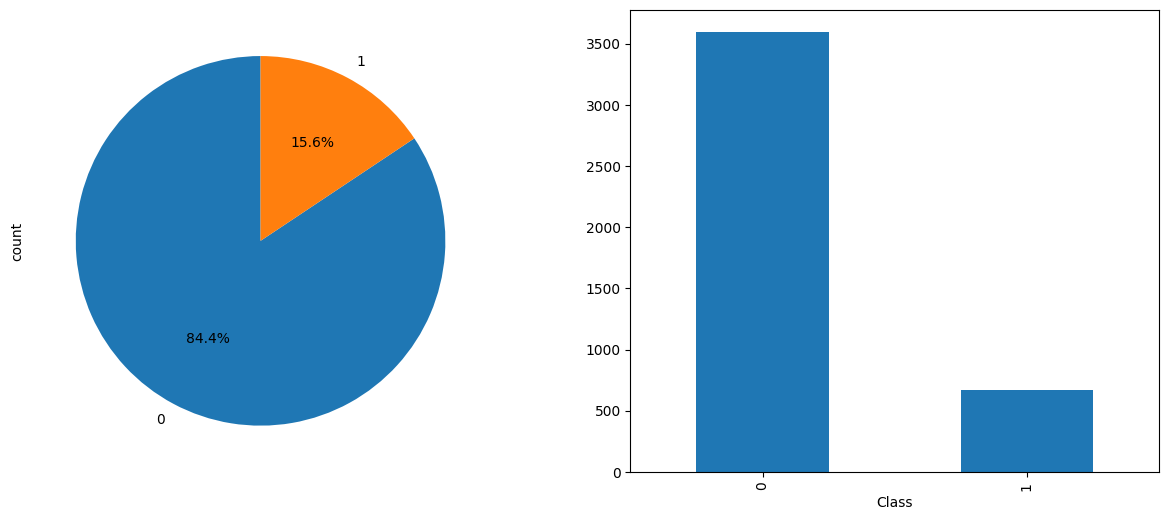

In [26]:
# Dependant Column Value Counts
print(augmented_df.Class.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
augmented_df['Class'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
augmented_df['Class'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

# **Handling Class imbalance**

In [27]:
## Handling target class imbalance using SMOTE
from collections import Counter

X = augmented_df.drop(columns='Class')     # independent features
Y = augmented_df['Class']                  # dependent features

print(f'Before Handling Imbalanced class {Counter(Y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)

# fit predictor and target variable
X, y = smote.fit_resample(X, Y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 3597, 1: 667})
After Handling Imbalanced class Counter({1: 3597, 0: 3597})


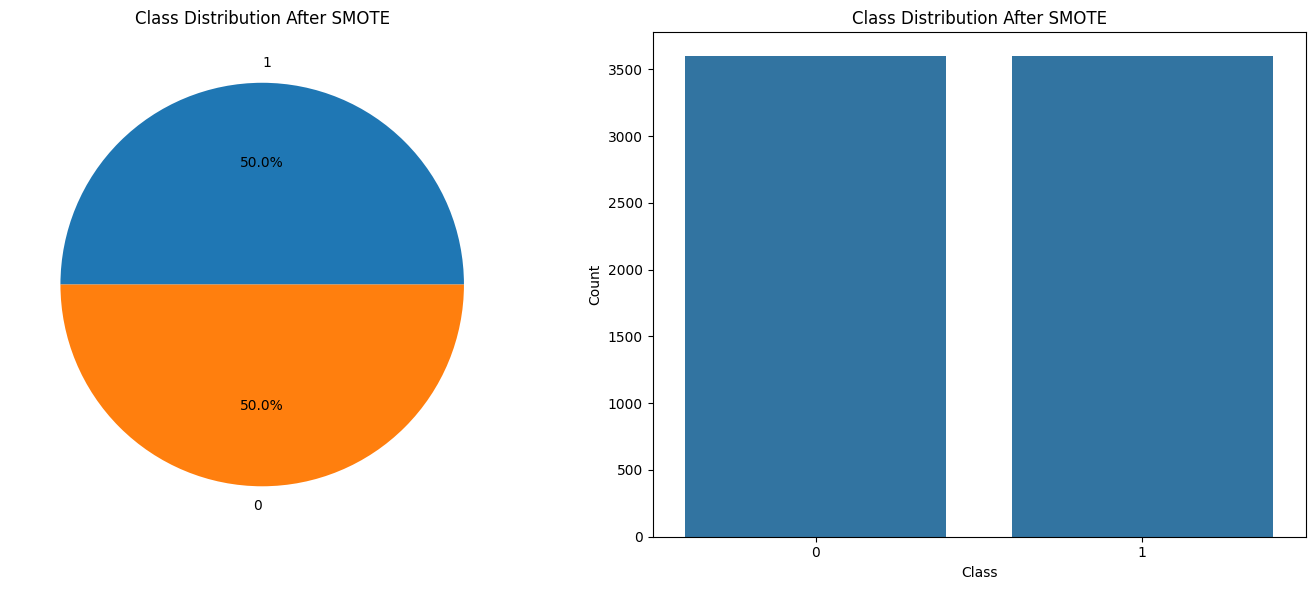

In [72]:
# Count the distribution after SMOTE
class_counts_after = Counter(y)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
ax[0].pie(class_counts_after.values(), labels=class_counts_after.keys(), autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
ax[0].set_title('Class Distribution After SMOTE')

# Bar plot
sns.barplot(x=list(class_counts_after.keys()), y=list(class_counts_after.values()), ax=ax[1])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

# Show plots
plt.tight_layout()
plt.show()

# **Data Scaling**

In [28]:
# Scaling your data
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the independent features
X_scaled = scaler.fit_transform(X)

# **Data Transformation**

In [29]:
# Transform Your data
# Using power tranform method
pt = PowerTransformer()
pscaled_x = pt.fit_transform(X_scaled)

# **Data Splitting**

In [30]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X_train, X_test, y_train, y_test = train_test_split(pscaled_x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5755, 3)
(1439, 3)


# **ML Model Implementation**

In [31]:
#Create a function to evaluate teh model

# empty list for appending performance metric score
model_result = []

def predict(ml_model, model_name):

  '''
  This function uses to Pass the model and predict value for different model.
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  '''

  # model fitting
  model = ml_model.fit(X_train, y_train)

  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics '''
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')

  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')

  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)

  '''Calculate threshold values for K-S chart'''

  # Compute the false positive rate, true positive rate, and thresholds for the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

  # Calculate the maximum difference between the true positive rate and false positive rate
  ks_stat = tpr - fpr

  # Compute the threshold that maximizes the difference between the false positive rate and the true positive rate
  ks_threshold = thresholds[np.argmax(ks_stat)]

  # Plot the KS chart
  plt.plot(thresholds, tpr, label='True Positive Rate')
  plt.plot(thresholds, fpr, label='False Positive Rate')
  plt.plot(thresholds, ks_stat, label='KS Statistic')
  plt.axvline(ks_threshold, color='black', linestyle='--', label=f'KS Threshold: {ks_threshold:.2f}')
  plt.title('KS Chart')
  plt.xlabel('Threshold')
  plt.ylabel('Rate')
  plt.legend()
  plt.show()


  '''Using the score from the performance metrics to create the final model_result'''
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy,
                       'test_accuracy':test_accuracy,
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,})

# **Logistic Regression**

L_Regression = Logistic Regression is a statistical method used for binary classification problems, where the outcome variable (dependent variable) is categorical and has two classes. It's commonly employed when the response variable is binary, meaning it can take only two possible values, often denoted as 0 and 1.

train accuracy : 0.663
test accuracy : 0.651
train precision : 0.661
test precision : 0.624
train recall : 0.684
test recall : 0.685
train f1 : 0.672
test f1 : 0.653
train roc_auc : 0.716
test roc_auc : 0.704
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       750
           1       0.62      0.69      0.65       689

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439

--------------------------------------------------------------------------------


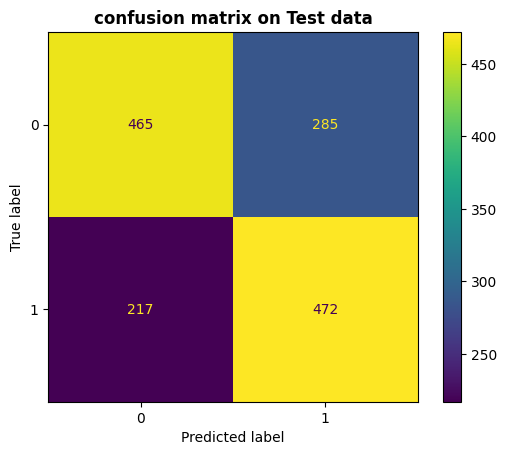

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     1     1     1     1     0     0     0     0     0     0
--------------------------------------------------------------------------------


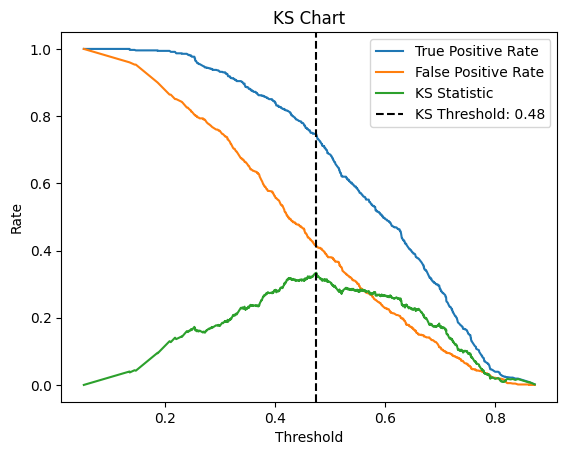

In [32]:
# fit the model
predict(LogisticRegression(), 'LogisticRegression')

# DecisionTree Clasifier


In [33]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [34]:
# Find optimal model for which our model gives us the best result
optimal_model = grid_search.best_params_
optimal_model

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',
                                max_depth= 50,
                                min_samples_leaf= 1,
                                min_samples_split= 2
                               )

train accuracy : 0.991
test accuracy : 0.832
train precision : 0.994
test precision : 0.808
train recall : 0.989
test recall : 0.851
train f1 : 0.992
test f1 : 0.829
train roc_auc : 1.0
test roc_auc : 0.841
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       750
           1       0.81      0.85      0.83       689

    accuracy                           0.83      1439
   macro avg       0.83      0.83      0.83      1439
weighted avg       0.83      0.83      0.83      1439

--------------------------------------------------------------------------------


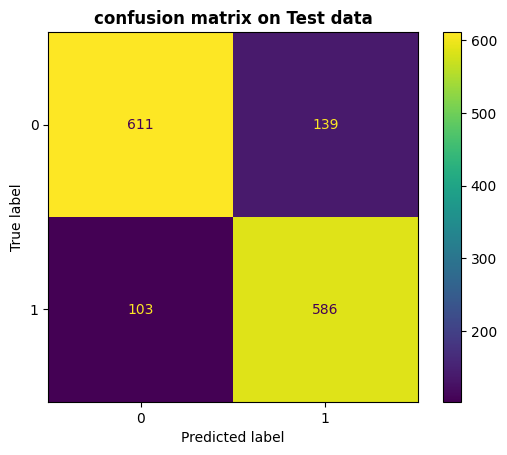

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     0     1     1     1     0     0     1     1     0     1
--------------------------------------------------------------------------------


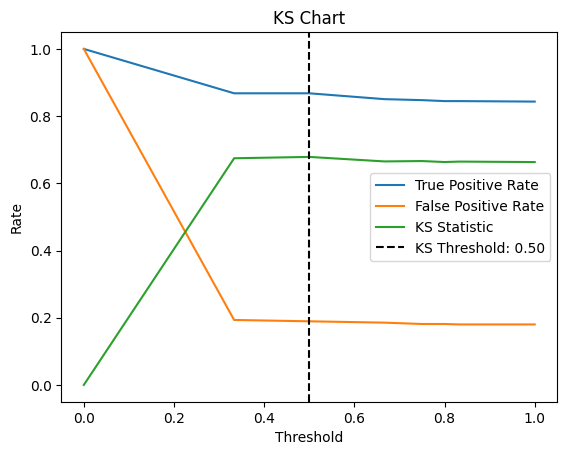

In [36]:
# Evaluate the model
predict(model, 'DecisionTree')

# **RandomForestClassifier**


In [37]:
param_grid = {'n_estimators': [50,75],           # number of trees in the ensemble
             'max_depth': [70,80],              # maximum number of levels allowed in each tree.
             'min_samples_split': [2,5],        # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,4]}         # minimum number of samples which can be stored in a tree leaf.     # minimum number of samples which can be stored in a tree leaf.

# performing Hyperparameter Tunning using RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# model fitting
rf_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [70, 80], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75]},
             verbose=2)

In [38]:
optimal_model = rf_gridsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=50,
                       random_state=42)

train accuracy : 0.926
test accuracy : 0.82
train precision : 0.907
test precision : 0.781
train recall : 0.95
test recall : 0.868
train f1 : 0.928
test f1 : 0.822
train roc_auc : 0.983
test roc_auc : 0.902
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       750
           1       0.78      0.87      0.82       689

    accuracy                           0.82      1439
   macro avg       0.82      0.82      0.82      1439
weighted avg       0.82      0.82      0.82      1439

--------------------------------------------------------------------------------


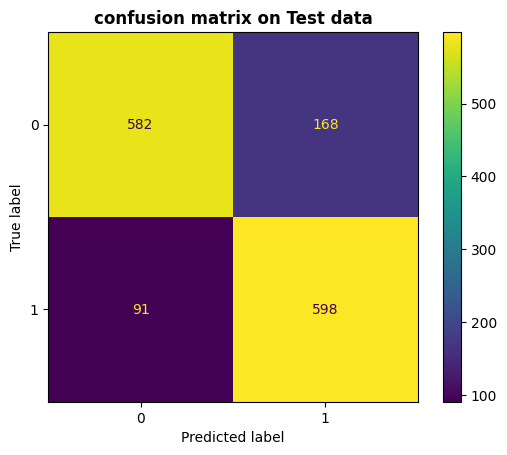

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     0     1     1     1     0     0     1     1     0     1
--------------------------------------------------------------------------------


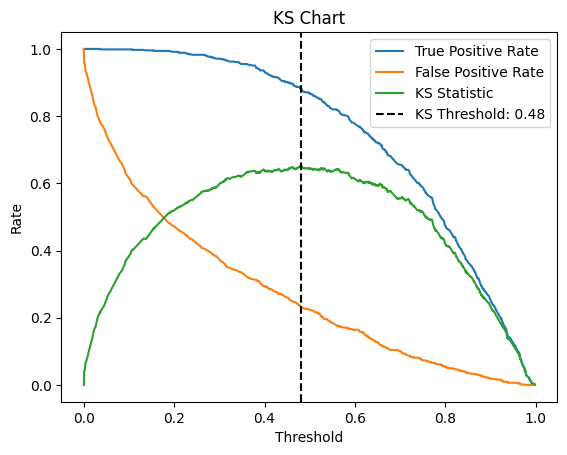

In [39]:
# Evaluate the model
predict(optimal_model, 'RandomForest')

In [41]:
# Model Explainability
# feature importance
importances = rf_gridsearch.best_estimator_.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features


,Feature,Feature Importance
2,Frequency_Monetary,0.435861
1,Time,0.326375
0,Recency,0.237764


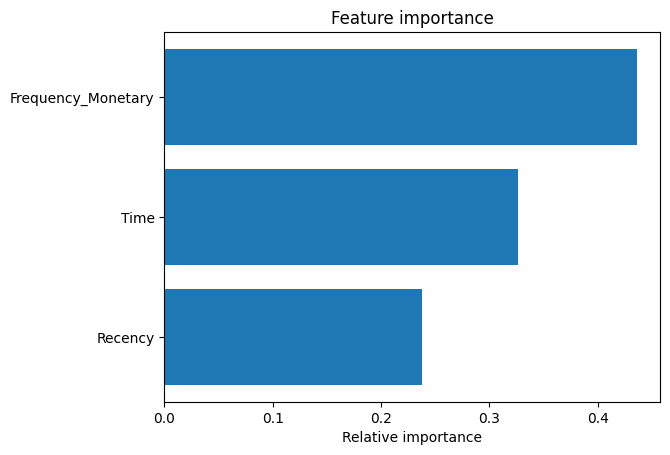

In [42]:
# plot the Variable importance
features = X.columns
importance = rf_gridsearch.best_estimator_.feature_importances_  # Access feature importances directly
indices = np.argsort(importance)

plt.title('Feature importance')
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()


# **AdaBoostClassifier**

In [40]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [40, 50, 60],
    'learning_rate': [0.01, 0.1, 0.2]
    }
## Create the GridSearchCV object

adaboost_model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# model fitting
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [40, 50, 60]},
             scoring='r2')

In [43]:
# Find optimal model for which our model gives us the best result
optimal_model = grid_search.best_estimator_
optimal_model

AdaBoostClassifier(learning_rate=0.2, n_estimators=60, random_state=42)

train accuracy : 0.692
test accuracy : 0.676
train precision : 0.682
test precision : 0.644
train recall : 0.731
test recall : 0.726
train f1 : 0.706
test f1 : 0.682
train roc_auc : 0.752
test roc_auc : 0.73
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       750
           1       0.64      0.73      0.68       689

    accuracy                           0.68      1439
   macro avg       0.68      0.68      0.68      1439
weighted avg       0.68      0.68      0.68      1439

--------------------------------------------------------------------------------


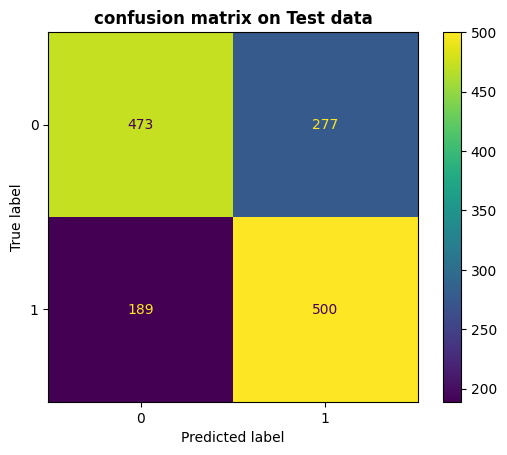

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     1     1     1     1     0     0     1     1     0     1
--------------------------------------------------------------------------------


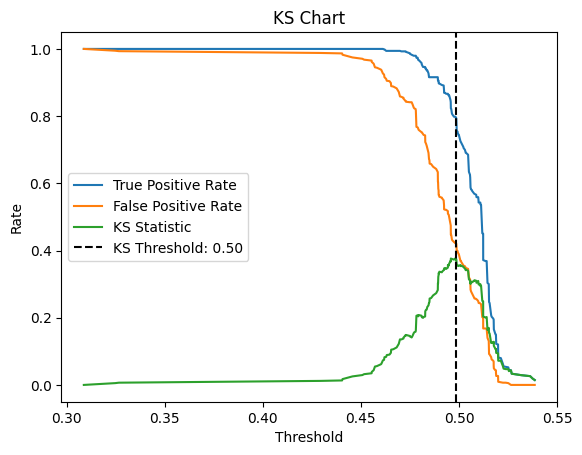

In [44]:
# Evaluate the model
predict(optimal_model, 'adaboost_model')

In [45]:
# Model Explainability
# feature importance
importances = grid_search.best_estimator_.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
1,Time,0.416667
2,Frequency_Monetary,0.366667
0,Recency,0.216667


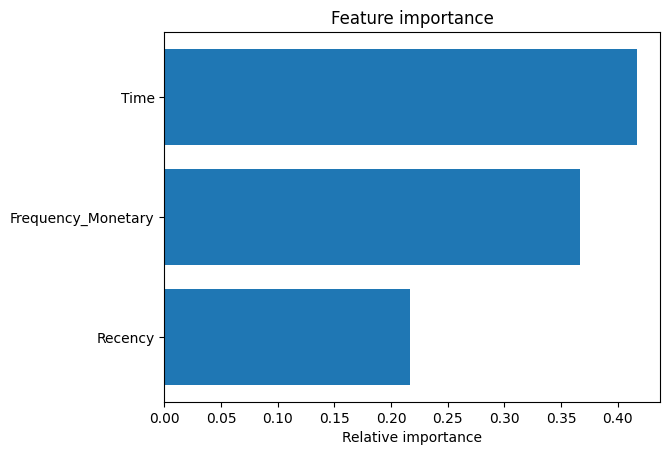

In [46]:
# plot the Variable importance
features = X.columns
importance = grid_search.best_estimator_.feature_importances_  # Access feature importances directly
indices = np.argsort(importance)

plt.title('Feature importance')
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

# **XGBClassifier**

In [47]:
xgb_params = {'n_estimators': [40,60,80],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier(random_state=42)
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7],
                         'n_estimators': [40, 60, 80]},
             verbose=2)

In [48]:
# Find optimal model for which our model gives us the best result

best_xgb_model= xgb_gridsearch.best_params_
best_xgb_model

{'learning_rate': 0.1,
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 80}

In [49]:
model = XGBClassifier(learning_rate=0.1, max_depth=9,
              min_samples_leaf=6,
              min_samples_split=5,
              n_estimators= 80)

train accuracy : 0.92
test accuracy : 0.843
train precision : 0.894
test precision : 0.799
train recall : 0.954
test recall : 0.898
train f1 : 0.923
test f1 : 0.846
train roc_auc : 0.978
test roc_auc : 0.916
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       750
           1       0.80      0.90      0.85       689

    accuracy                           0.84      1439
   macro avg       0.85      0.85      0.84      1439
weighted avg       0.85      0.84      0.84      1439

--------------------------------------------------------------------------------


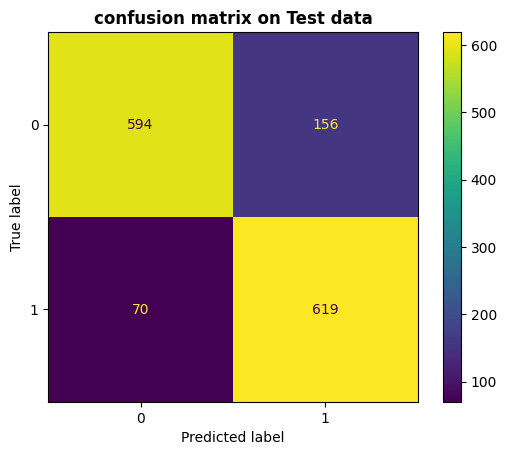

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     0     1     1     1     0     0     1     1     0     1
--------------------------------------------------------------------------------


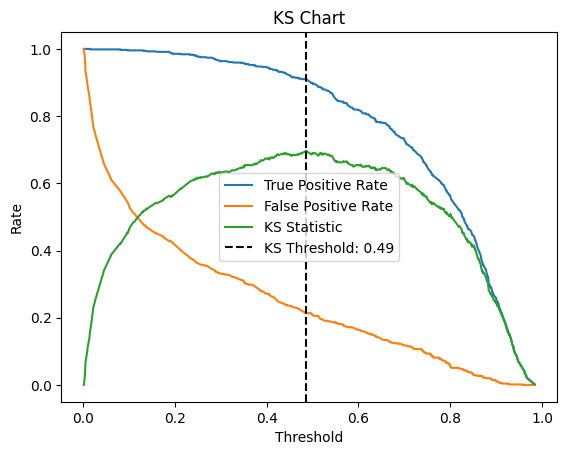

In [50]:
# Evaluate the model
predict(model, 'XGboost_model')

In [51]:
# Model Explainability
# feature importance
importances = xgb_gridsearch.best_estimator_.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features


,Feature,Feature Importance
0,Recency,0.429187
1,Time,0.305194
2,Frequency_Monetary,0.265619


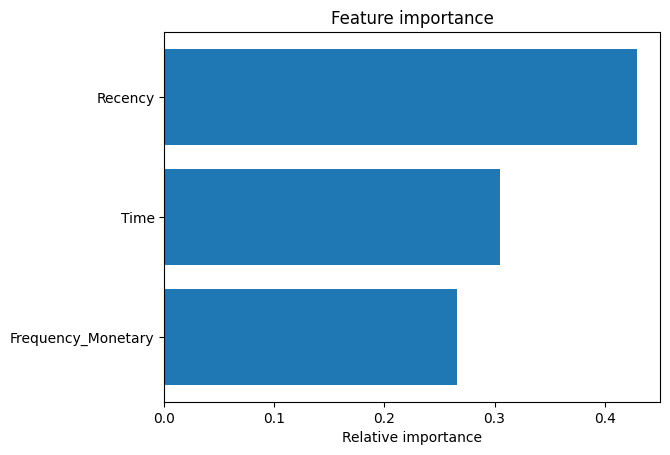

In [52]:
# plot the Variable importance
features = X.columns
importance = xgb_gridsearch.best_estimator_.feature_importances_  # Access feature importances directly
indices = np.argsort(importance)

plt.title('Feature importance')
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

# **LGBMClassifier**

In [53]:
lgb_params = {'n_estimators': [70,100],   # number of trees in the ensemble
          'max_depth': [7,9],             # maximum number of levels allowed in each tree.
          'min_samples_split': [4,5],     # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [4,6]}      # minimum number of samples which can be stored in a tree leaf.


# performing Hyperparameter Tunning using GridSearchCV
lgb = LGBMClassifier(objective='binary')
lgb_gridsearch = GridSearchCV(estimator=lgb, param_grid=lgb_params, cv=5, verbose=2, n_jobs=-1)
lgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 2908, number of negative: 2847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 5755, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505300 -> initscore=0.021200
[LightGBM] [Info] Start training from score 0.021200


GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'), n_jobs=-1,
             param_grid={'max_depth': [7, 9], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5],
                         'n_estimators': [70, 100]},
             verbose=2)

In [54]:
best_lgb_model= lgb_gridsearch.best_estimator_
best_lgb_model

LGBMClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=4,
               objective='binary')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 2908, number of negative: 2847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 5755, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505300 -> initscore=0.021200
[LightGBM] [Info] Start training from score 0.021200
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_sam

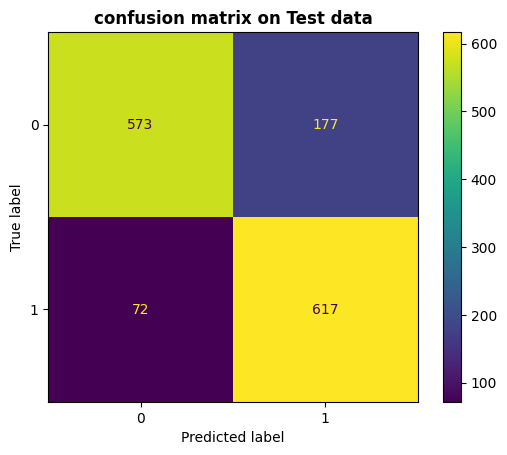

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     0     1     1     1     0     0     1     1     0     1
--------------------------------------------------------------------------------


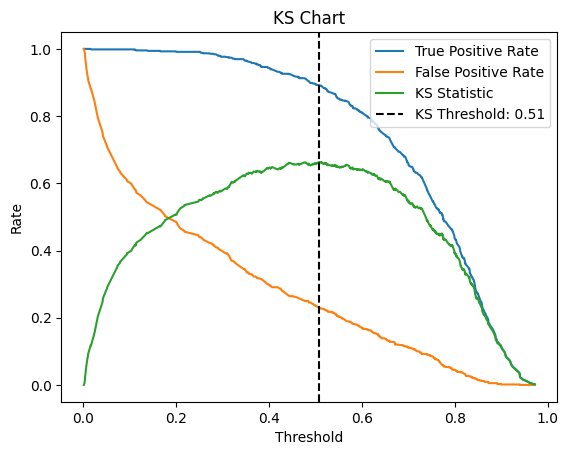

In [55]:
predict(best_lgb_model, 'LightGBM')

# **K-Nearest Neighbour**

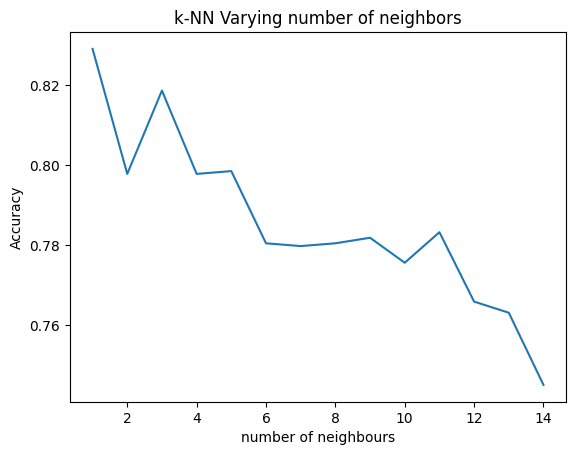

In [56]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 0.99
test accuracy : 0.829
train precision : 0.99
test precision : 0.808
train recall : 0.99
test recall : 0.843
train f1 : 0.99
test f1 : 0.825
train roc_auc : 0.99
test roc_auc : 0.83
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       750
           1       0.81      0.84      0.83       689

    accuracy                           0.83      1439
   macro avg       0.83      0.83      0.83      1439
weighted avg       0.83      0.83      0.83      1439

--------------------------------------------------------------------------------


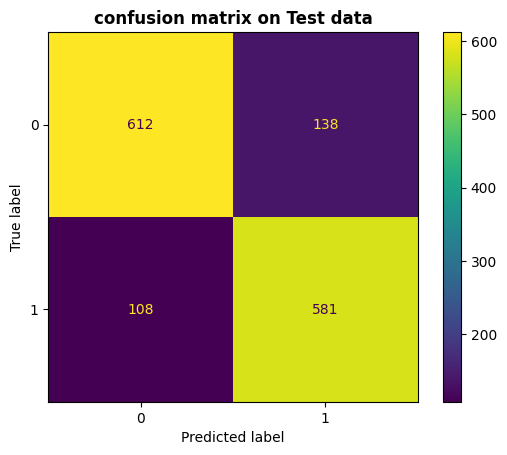

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     0     1     1     1     0     0     0     1     0     1
--------------------------------------------------------------------------------


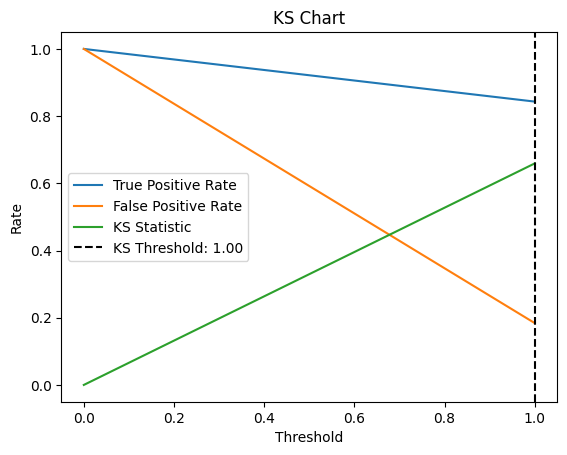

In [57]:
# Evaluate the modle
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

# **Neural Network**

In [58]:
# Define the hyperparameter grid for MLPClassifier
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Number of neurons in the hidden layers
    'activation': ['relu', 'tanh'],                  # Activation function
    'solver': ['adam', 'sgd'],                       # Optimizer
    'alpha': [0.0001, 0.001],                        # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],       # Learning rate schedule
    'max_iter': [200, 300],                          # Maximum number of iterations
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Perform GridSearchCV
mlp_gridsearch = GridSearchCV(estimator=mlp, param_grid=mlp_params, cv=5, n_jobs=-1, verbose=2)

# Fit the model
mlp_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [200, 300], 'solver': ['adam', 'sgd']},
             verbose=2)

In [59]:
best_NR_model= mlp_gridsearch.best_estimator_
best_NR_model

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), random_state=42)

train accuracy : 0.76
test accuracy : 0.732
train precision : 0.725
test precision : 0.681
train recall : 0.846
test recall : 0.832
train f1 : 0.781
test f1 : 0.749
train roc_auc : 0.84
test roc_auc : 0.804
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.81      0.64      0.71       750
           1       0.68      0.83      0.75       689

    accuracy                           0.73      1439
   macro avg       0.74      0.74      0.73      1439
weighted avg       0.75      0.73      0.73      1439

--------------------------------------------------------------------------------


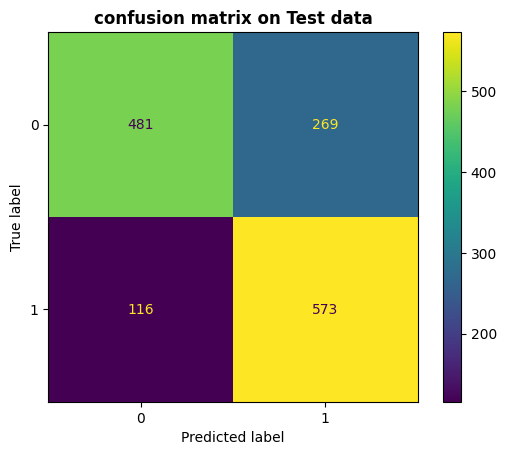

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     1     0     1     1     0     0     1     1     0     1
--------------------------------------------------------------------------------


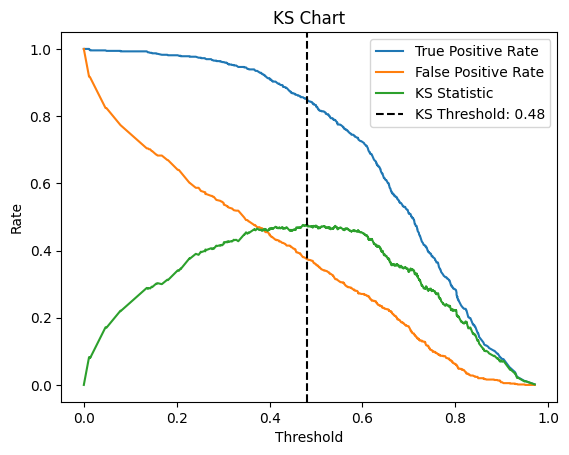

In [60]:
predict(best_NR_model, 'Neural Network')

# **Support Vector Machine (SVM)**

In [61]:
# Define the hyperparameter grid for SVC
svm_params = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto'],     # Kernel coefficient (only for 'rbf' and similar kernels)
    'degree': [3, 4],               # Degree of the polynomial kernel function (if 'poly')
}

# Initialize the SVM classifier
svm = SVC(random_state=42,probability=True)

# Perform GridSearchCV
svm_gridsearch = GridSearchCV(estimator=svm, param_grid=svm_params, cv=5, n_jobs=-1, verbose=2)

# Fit the model
svm_gridsearch.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [62]:
best_SVC_model= svm_gridsearch.best_estimator_
best_SVC_model

SVC(C=10, gamma='auto', probability=True, random_state=42)

train accuracy : 0.726
test accuracy : 0.706
train precision : 0.7
test precision : 0.663
train recall : 0.8
test recall : 0.787
train f1 : 0.747
test f1 : 0.719
train roc_auc : 0.789
test roc_auc : 0.757
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       750
           1       0.66      0.79      0.72       689

    accuracy                           0.71      1439
   macro avg       0.71      0.71      0.71      1439
weighted avg       0.72      0.71      0.70      1439

--------------------------------------------------------------------------------


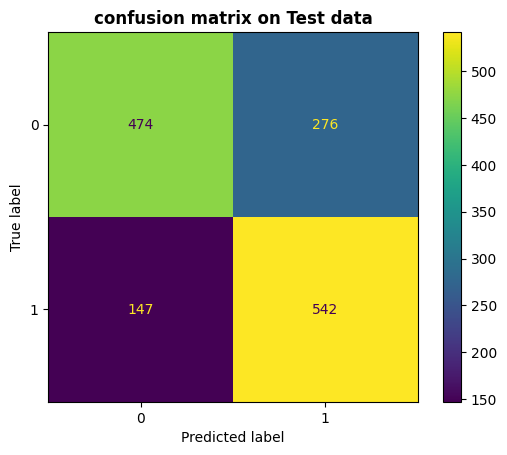

--------------------------------------------------------------------------------
           4054  3813  5065  4339  1615  4076  5380  132   308   5163
y_actual      0     1     1     1     0     0     1     1     0     1
y_predict     1     1     1     1     0     0     0     1     0     0
--------------------------------------------------------------------------------


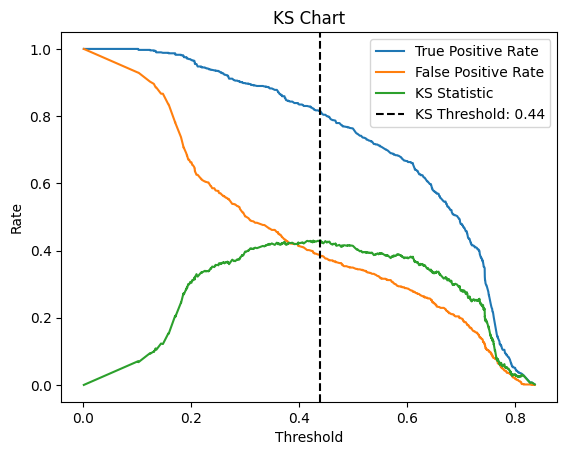

In [63]:
predict(best_SVC_model, 'SVC')

## Model Result and Conclusion

In [64]:
model_result = pd.DataFrame(model_result)
round(model_result,2)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc
0,LogisticRegression,0.66,0.65,0.66,0.62,0.68,0.69,0.67,0.65,0.72
1,DecisionTree,0.99,0.83,0.99,0.81,0.99,0.85,0.99,0.83,1.00
2,RandomForest,0.93,0.82,0.91,0.78,0.95,0.87,0.93,0.82,0.98
3,adaboost_model,0.69,0.68,0.68,0.64,0.73,0.73,0.71,0.68,0.75
4,XGboost_model,0.92,0.84,0.89,0.80,0.95,0.90,0.92,0.85,0.98
5,LightGBM,0.89,0.83,0.85,0.78,0.94,0.90,0.90,0.83,0.96
6,KNN,0.99,0.83,0.99,0.81,0.99,0.84,0.99,0.83,0.99
7,Neural Network,0.76,0.73,0.72,0.68,0.85,0.83,0.78,0.75,0.84
8,SVC,0.73,0.71,0.70,0.66,0.80,0.79,0.75,0.72,0.79


The majority and minority of the count in our dataset come from the negative and positive, respectively. Accuracy scores aren't very helpful when dealing with imbalanced data or classes.

In order to avoid false negatives, we need to minimize situations where the model predicts that a patient situation, when in reality, they do. Similarly, to minimize false positives, we need to increase the precision and recall scores, which will positively impact the f1_score. In our scenario, recall should take precedence over precision. Hence, we should aim for moderate f1_score and high recall scores. As a result, the model's recall score will be the primary focus of our project.

Balanced accuracy is a better metric than F1 when positives and negatives are equally important. When more attention is required, F1 is an excellent scoring metric for imbalanced data.

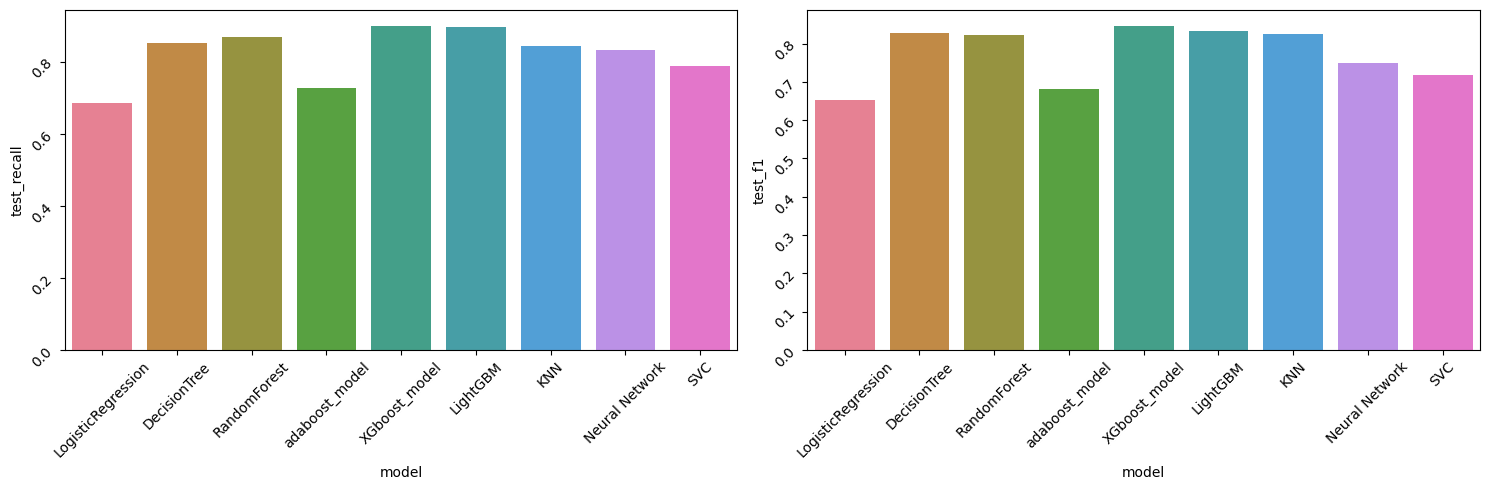

In [65]:
# plotting graph to compaire model performance of all the models

# Visualizing evaluation Metric Score chart

fig, ax = plt.subplots(1,2, figsize=(15,5))
# Create a colorful palette
colors = sns.color_palette("husl", len(model_result['model']))

sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=ax[0],palette=colors)           # Model Vs test R2
ax[0].tick_params(rotation=45)
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=ax[1],palette=colors)       # Model Vs test Adj R2
ax[1].tick_params(rotation=45)
plt.tight_layout()


**From a patient's point of view, you'd prefer the XGboost model. It is the most likely to detect health issues accurately while balancing the risk of false alarms. This balance is essential in healthcare, where missing a diagnosis could be dangerous, but too many false alarms could lead to unnecessary anxiety and treatment.**